<a href="https://colab.research.google.com/github/Cyril-19/gunew/blob/main/vehicle_perfomance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns 
sns.set()

In [6]:
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format

In [7]:
df=pd.read_csv("/content/data.csv")
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.00,130,3504,12.00,1970,chevrolet chevelle malibu,7.65
1,1,8,350.00,165,3693,11.50,1970,buick skylark 320,6.38
2,1,8,318.00,150,3436,11.00,1970,plymouth satellite,7.65
3,1,8,304.00,150,3433,12.00,1970,amc rebel sst,6.80
4,1,8,302.00,140,3449,10.50,1970,ford torino,7.23


In [8]:
data=df.copy(deep=True)

In [12]:
data.shape    

(398, 9)

In [13]:
df.shape

(398, 9)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [21]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [27]:
data=data[data.horsepower!='?']
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [31]:
data.horsepower=data.horsepower.astype('float')

In [32]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [33]:
data.shape

(392, 9)

In [35]:
data_1 = data.copy(deep = True)

In [36]:
data_1.origin = data_1.origin.astype('object')
data_1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.00,130.00,3504,12.00,1970,chevrolet chevelle malibu,7.65
1,1,8,350.00,165.00,3693,11.50,1970,buick skylark 320,6.38
2,1,8,318.00,150.00,3436,11.00,1970,plymouth satellite,7.65
3,1,8,304.00,150.00,3433,12.00,1970,amc rebel sst,6.80
4,1,8,302.00,140.00,3449,10.50,1970,ford torino,7.23


In [37]:
data_1[["Manufacture", "Model"]] = data_1['name'].str.split(" ",n=1, expand = True)
data_1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,Manufacture,Model
0,1,8,307.00,130.00,3504,12.00,1970,chevrolet chevelle malibu,7.65,chevrolet,chevelle malibu
1,1,8,350.00,165.00,3693,11.50,1970,buick skylark 320,6.38,buick,skylark 320
2,1,8,318.00,150.00,3436,11.00,1970,plymouth satellite,7.65,plymouth,satellite
3,1,8,304.00,150.00,3433,12.00,1970,amc rebel sst,6.80,amc,rebel sst
4,1,8,302.00,140.00,3449,10.50,1970,ford torino,7.23,ford,torino


In [38]:
data_1.drop("name", axis = 1, inplace = True)

In [39]:
print(sorted(data_1.Manufacture.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [40]:
errors = {
    "vokswagen": 'volkswagen',
    "vw":"volkswagen",
    "toyouta":"toyota",
    "mercedes-benz":"mercedes",
    "chevroelt": "chevrolet",
    "chevy":"chevrolet",
    "maxda":"mazda"
}
data_1.Manufacture = data_1.Manufacture.map(errors).fillna(data_1.Manufacture)

In [48]:
data_1['Manufacture'].value_counts()

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
fiat           8
peugeot        8
audi           7
volvo          6
chrysler       6
saab           4
opel           4
subaru         4
mercedes       3
renault        3
cadillac       2
bmw            2
capri          1
hi             1
triumph        1
nissan         1
Name: Manufacture, dtype: int64

In [ ]:
print(len(data_1.Model.unique()))

In [50]:
import re
def alphanum(x):
    return re.sub('[^A-Za-z0-9]+',"", (str(x)))
data_1['Model']=data_1.Model.apply(lambda x:alphanum(x) )

In [52]:
print(len(data_1.Model.unique()))

293


In [53]:
data_1.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,5.47,194.41,104.47,2977.58,15.54,1975.98,9.97
std,1.71,104.64,38.49,849.40,2.76,3.68,3.32
min,3.00,68.00,46.00,1613.00,8.00,1970.00,3.83
25%,4.00,105.00,75.00,2225.25,13.78,1973.00,7.23
50%,4.00,151.00,93.50,2803.50,15.50,1976.00,9.67
75%,8.00,275.75,126.00,3614.75,17.02,1979.00,12.33
max,8.00,455.00,230.00,5140.00,24.80,1982.00,19.81


In [54]:
data_1.describe(include = 'object')

,origin,Manufacture,Model
count,392,392,392
unique,3,30,293
top,1,ford,rabbit
freq,245,48,5


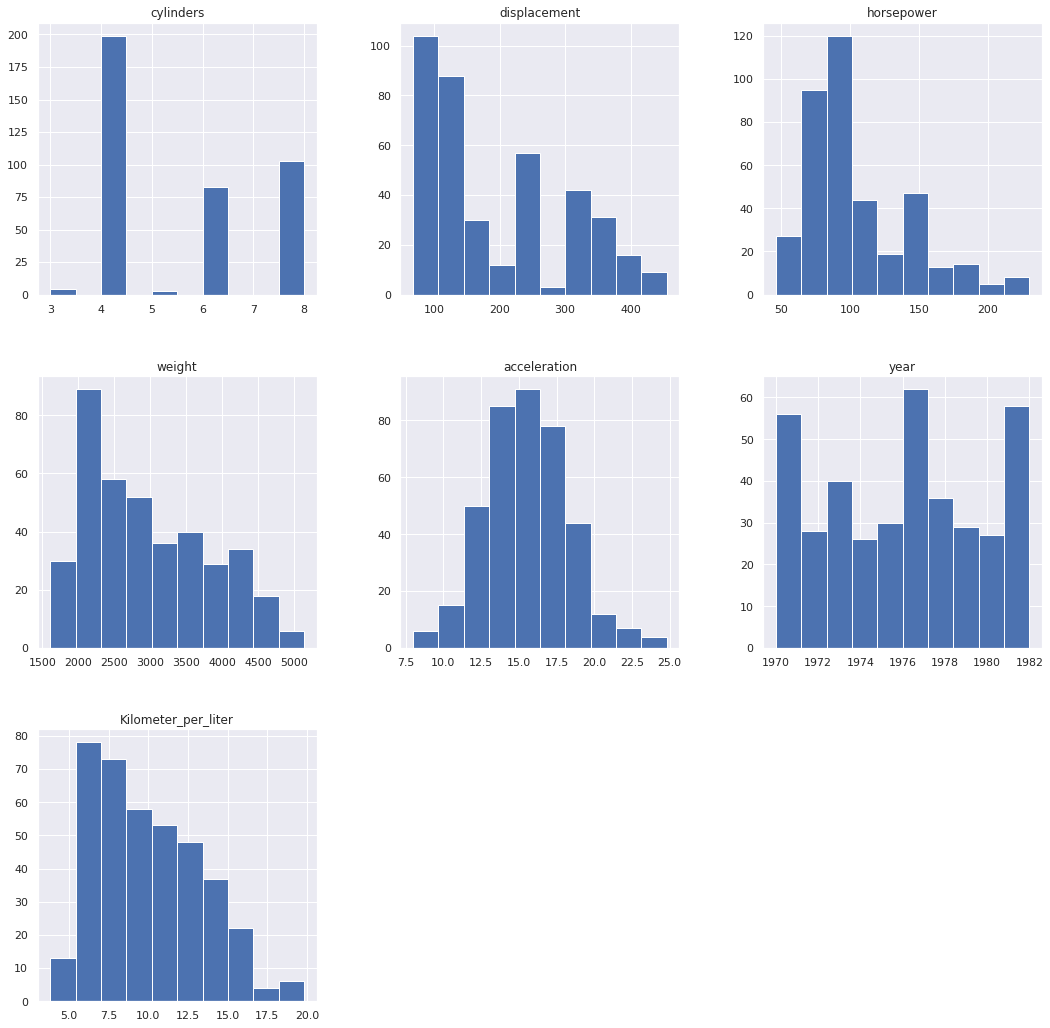

In [55]:
fig= data_1.hist(figsize = (18,18))

In [56]:
data_1.Kilometer_per_liter.describe()

count   392.00
mean      9.97
std       3.32
min       3.83
25%       7.23
50%       9.67
75%      12.33
max      19.81
Name: Kilometer_per_liter, dtype: float64

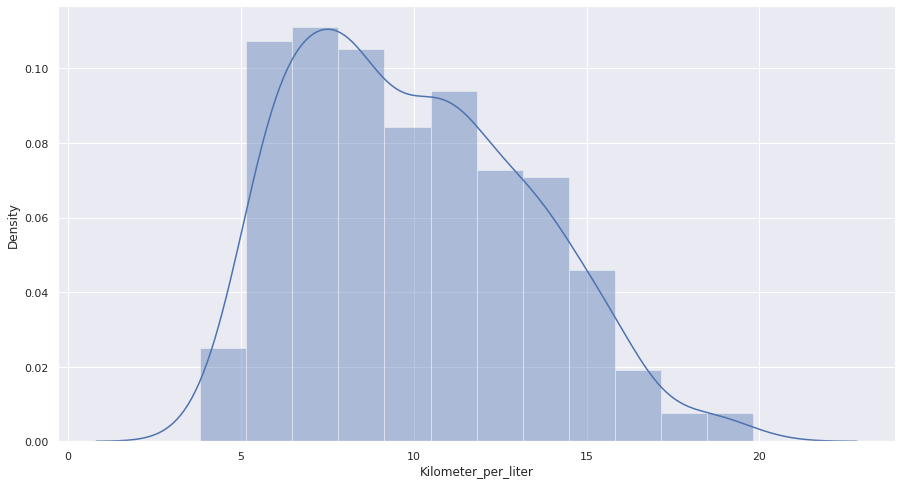

In [57]:
sns.distplot(data_1.Kilometer_per_liter)

<function matplotlib.pyplot.show(*args, **kw)>

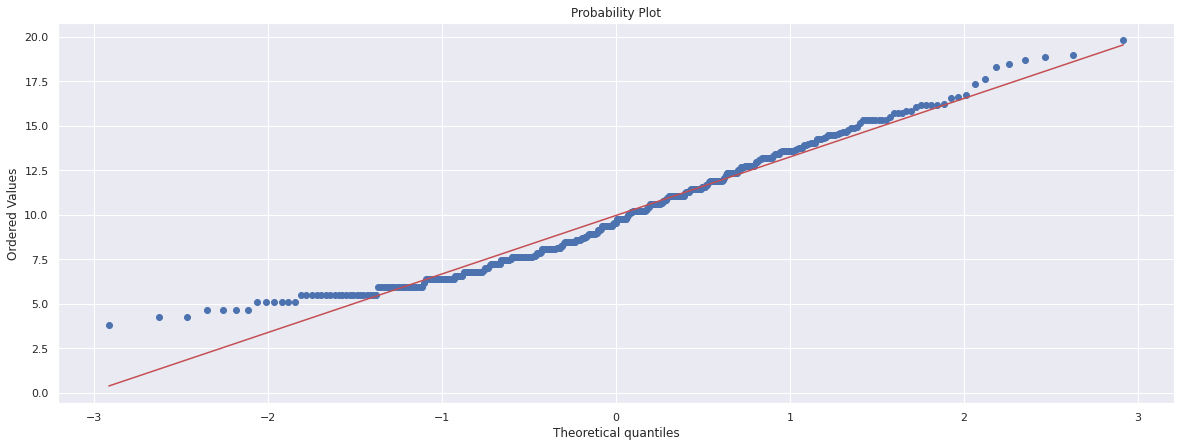

In [58]:
plt.figure(figsize = (20,7))
stats.probplot(data_1['Kilometer_per_liter'], plot = plt)
plt.show

In [59]:
print("Skewness: %f" % data_1['Kilometer_per_liter'].skew())

Skewness: 0.457092


In [60]:
data_2 = data_1.copy(deep = True)

In [61]:
data_2['log_mileage'] = np.log(data_2.Kilometer_per_liter)

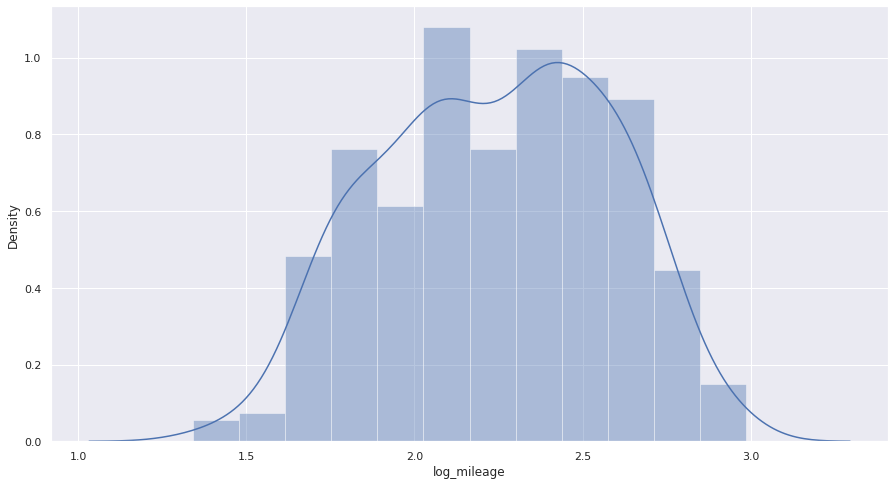

In [62]:
sns.distplot(data_2.log_mileage)

<function matplotlib.pyplot.show(*args, **kw)>

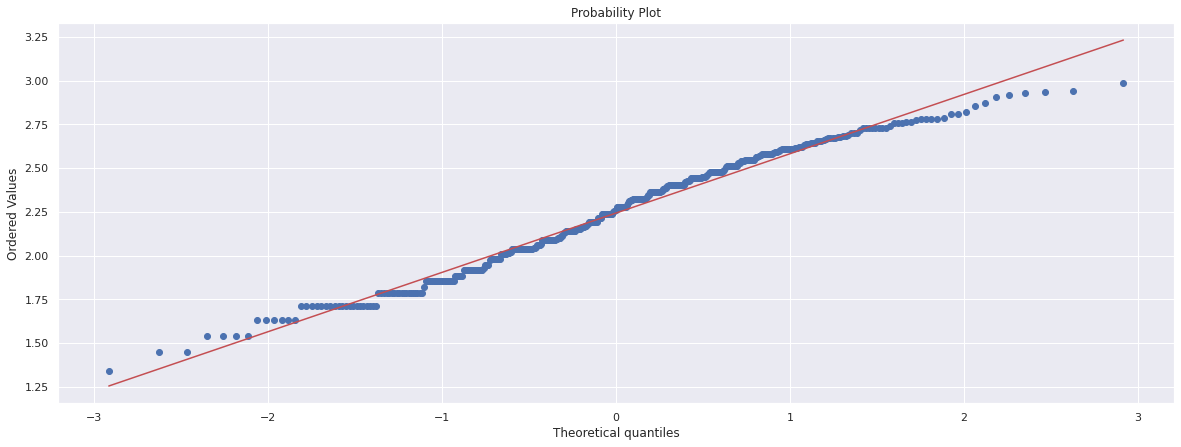

In [63]:
plt.figure(figsize = (20,7))
stats.probplot(data_2['log_mileage'], plot = plt)
plt.show

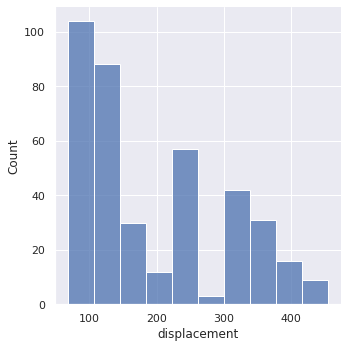

In [64]:
sns.displot(data_2.displacement)

<function matplotlib.pyplot.show(*args, **kw)>

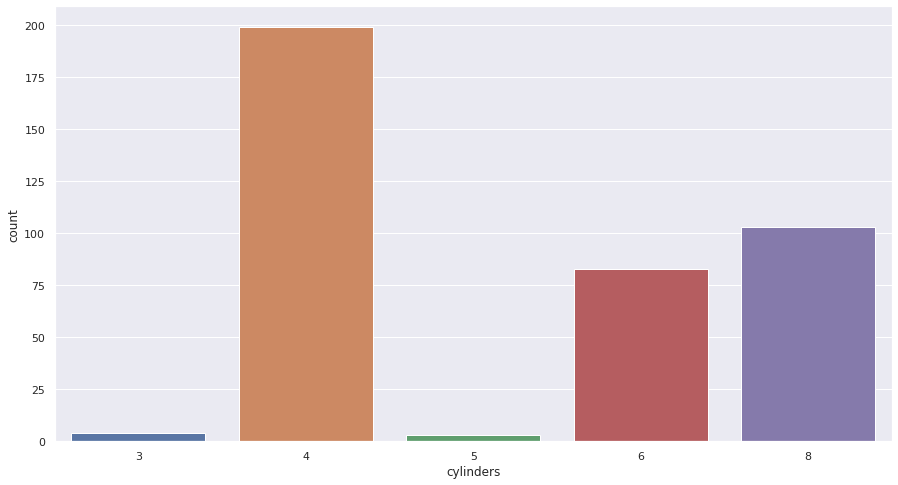

In [65]:
sns.countplot(data_2.cylinders, data= data_1)
plt.show

In [66]:
data_3 = data_2.copy(deep = True)

In [67]:
data_3.cylinders = data_3.cylinders.astype('object')

In [69]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
 8   Manufacture          392 non-null    object 
 9   Model                392 non-null    object 
 10  log_mileage          392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 44.9+ KB


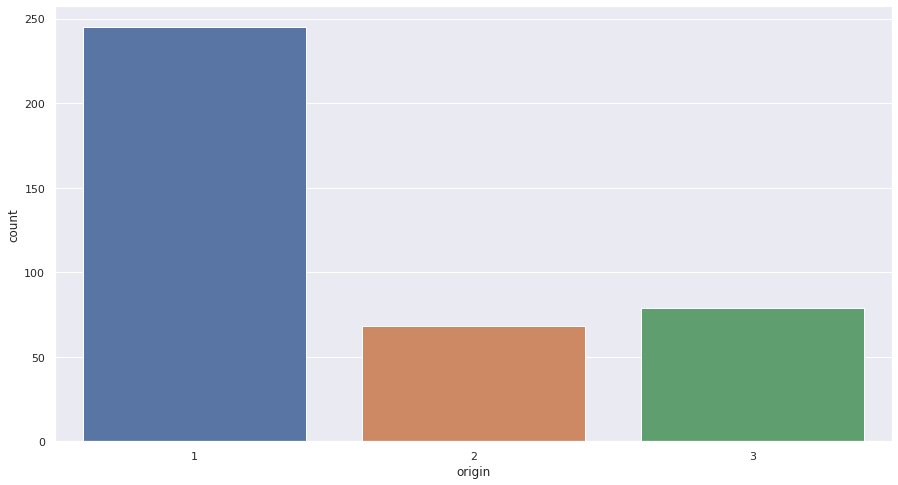

In [70]:
sns.countplot(data_3.origin)
plt.show()

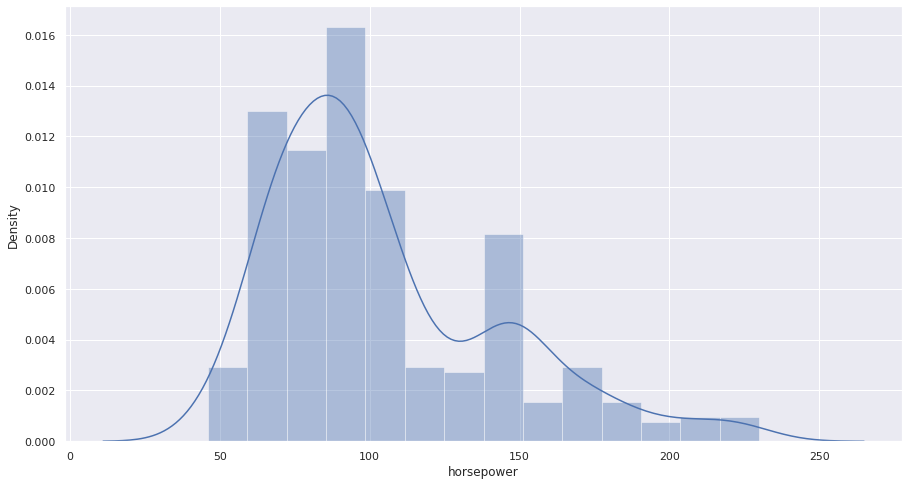

In [71]:
sns.distplot(data_3.horsepower)

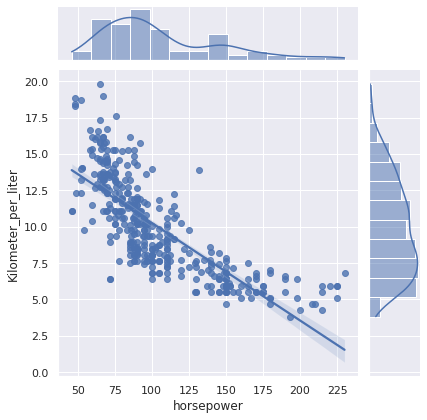

In [72]:
x= data_3[['Kilometer_per_liter', 'horsepower']]
sns.jointplot(x.loc[:, 'horsepower'], x.loc[:, 'Kilometer_per_liter'], kind= 'reg')

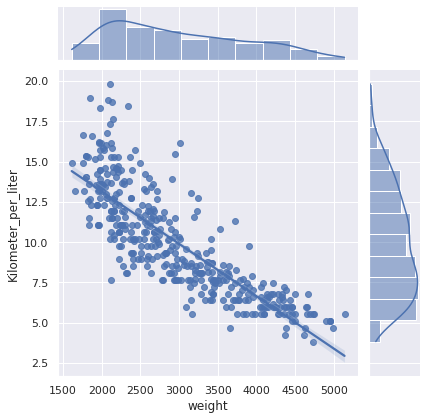

In [73]:
x= data_3[['Kilometer_per_liter', 'weight']]
sns.jointplot(x.loc[:, 'weight'], x.loc[:, 'Kilometer_per_liter'], kind= 'reg')


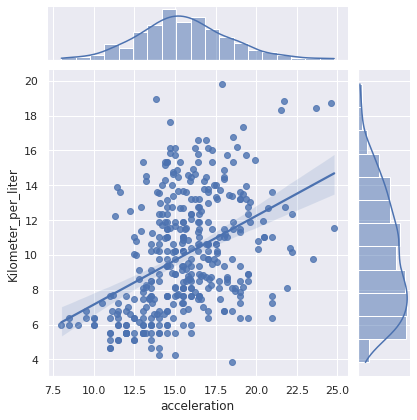

In [74]:
x= data_3[['Kilometer_per_liter', 'acceleration']]
sns.jointplot(x.loc[:, 'acceleration'], x.loc[:, 'Kilometer_per_liter'], kind= 'reg')

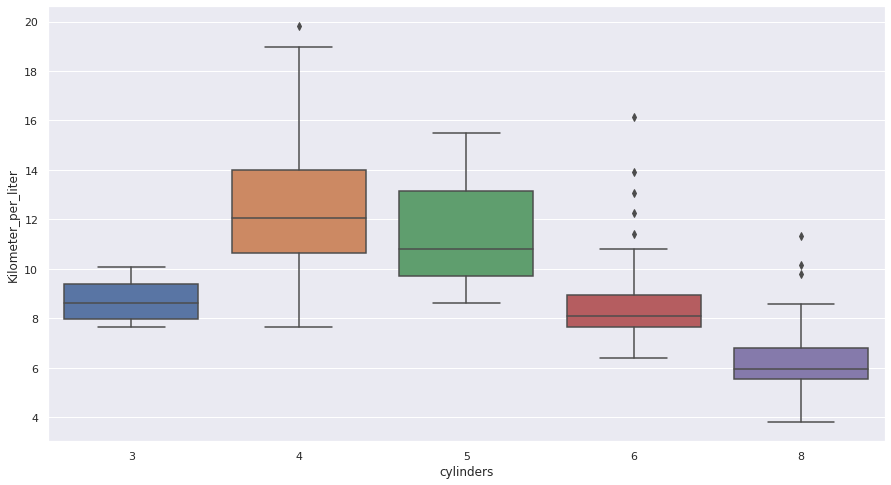

In [75]:
sns.boxplot(y = 'Kilometer_per_liter', x= 'cylinders', data = data_3)
plt.show()

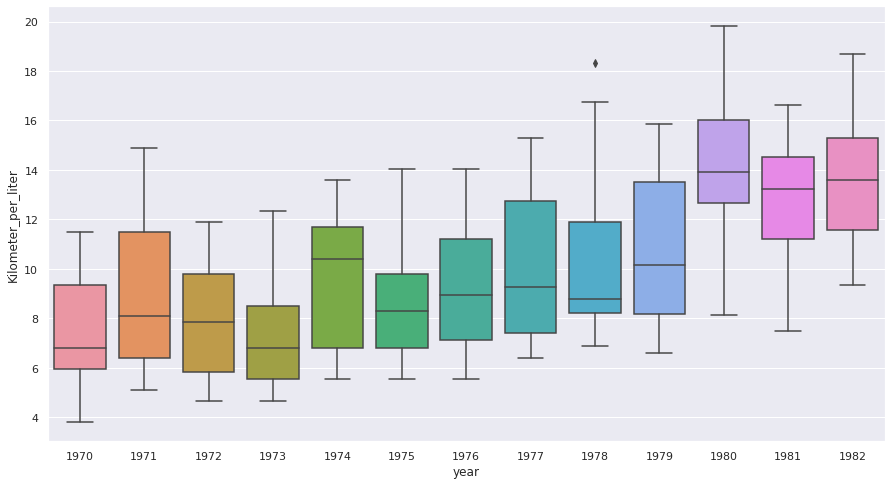

In [76]:
sns.boxplot(y = 'Kilometer_per_liter', x= 'year', data = data_3)
plt.show()

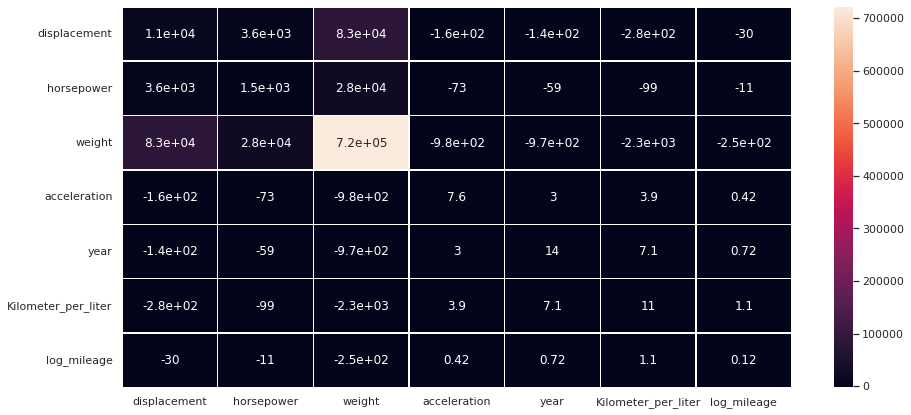

In [77]:
plt.figure(figsize = (15,7))
sns.heatmap(data_3.cov(), annot = True, linewidth = 0.5)
plt.show()

In [78]:
data_num = data_3.drop(['Kilometer_per_liter', 'log_mileage', 'origin'], axis = 1)
corr = data_num.corr()
corr

,displacement,horsepower,weight,acceleration,year
displacement,1.00,0.90,0.93,-0.54,-0.37
horsepower,0.90,1.00,0.86,-0.69,-0.42
weight,0.93,0.86,1.00,-0.42,-0.31
acceleration,-0.54,-0.69,-0.42,1.00,0.29
year,-0.37,-0.42,-0.31,0.29,1.00


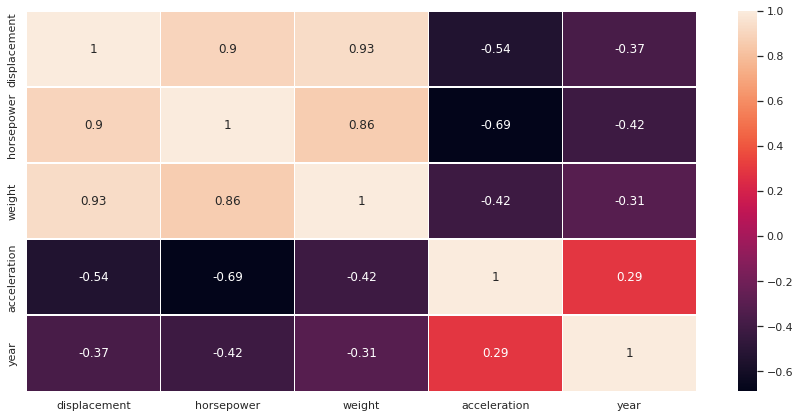

In [79]:
f,ax = plt.subplots(figsize = (15,7))
sns.heatmap(data_num.corr(), annot = True, linewidth = 0.5)

In [80]:
drop_list = [ 'weight', 'displacement', 'Manufacture', 'Model']
data_clean = data_3.drop(drop_list, axis = 1)
data_clean.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130.00,12.00,1970,7.65,2.04
1,1,8,165.00,11.50,1970,6.38,1.85
2,1,8,150.00,11.00,1970,7.65,2.04
3,1,8,150.00,12.00,1970,6.80,1.92
4,1,8,140.00,10.50,1970,7.23,1.98


In [81]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   horsepower           392 non-null    float64
 3   acceleration         392 non-null    float64
 4   year                 392 non-null    int64  
 5   Kilometer_per_liter  392 non-null    float64
 6   log_mileage          392 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 32.6+ KB


In [82]:
data_dummy = pd.get_dummies(data_clean, drop_first = True)
data_dummy.head()

,horsepower,acceleration,year,Kilometer_per_liter,log_mileage,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.00,12.00,1970,7.65,2.04,0,0,0,0,0,1
1,165.00,11.50,1970,6.38,1.85,0,0,0,0,0,1
2,150.00,11.00,1970,7.65,2.04,0,0,0,0,0,1
3,150.00,12.00,1970,6.80,1.92,0,0,0,0,0,1
4,140.00,10.50,1970,7.23,1.98,0,0,0,0,0,1


In [83]:
from sklearn.preprocessing import MinMaxScaler


In [84]:
x = data_dummy.drop(['Kilometer_per_liter','log_mileage' ], axis = 1)
x.head()

,horsepower,acceleration,year,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.00,12.00,1970,0,0,0,0,0,1
1,165.00,11.50,1970,0,0,0,0,0,1
2,150.00,11.00,1970,0,0,0,0,0,1
3,150.00,12.00,1970,0,0,0,0,0,1
4,140.00,10.50,1970,0,0,0,0,0,1


In [85]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [86]:
x = scaler.fit_transform(x)


In [87]:
print(x)

[[0.45652174 0.23809524 0.         ... 0.         0.         1.        ]
 [0.64673913 0.20833333 0.         ... 0.         0.         1.        ]
 [0.56521739 0.17857143 0.         ... 0.         0.         1.        ]
 ...
 [0.20652174 0.21428571 1.         ... 0.         0.         0.        ]
 [0.17934783 0.63095238 1.         ... 0.         0.         0.        ]
 [0.19565217 0.67857143 1.         ... 0.         0.         0.        ]]


In [88]:
y = data_dummy.log_mileage
print(y)

0     2.04
1     1.85
2     2.04
3     1.92
4     1.98
      ... 
393   2.44
394   2.93
395   2.61
396   2.48
397   2.58
Name: log_mileage, Length: 392, dtype: float64


In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 10)


In [94]:
from sklearn.linear_model import LinearRegression
OLS_model = LinearRegression()
OLS_model.fit(x_train, y_train)

LinearRegression()

In [95]:
y_pred_OLS = OLS_model.predict(x_test)

In [96]:
r_sq_OLS = OLS_model.score(x_train, y_train)
print("R_Squ_OLS: ", r_sq_OLS)
n = 313 # sample size
p = 9 # independent variable
adj_r_sq_OLS = 1- (1-r_sq_OLS)*(n-1)/(n-p-1)
print("Adj_R_Squ_OLS: ", adj_r_sq_OLS)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test, y_pred_OLS))
print("RMSE_OLS: ", rmse_OLS)


R_Squ_OLS:  0.8590484667691763
Adj_R_Squ_OLS:  0.8548617875643004
RMSE_OLS:  0.12884547136168112


In [99]:
from sklearn.linear_model import SGDRegressor
SGD_model = SGDRegressor(loss = "squared_loss", alpha = 0.01, max_iter = 100000)
SGD_model.fit(x_train, y_train)

SGDRegressor(alpha=0.01, loss='squared_loss', max_iter=100000)

In [100]:
y_pred_SGD = SGD_model.predict(x_test)

In [101]:
r_sq_SGD = SGD_model.score(x_train, y_train)
print("R_Squ_SGD: ", r_sq_SGD)
n = 313 
p = 9 
adj_r_sq_SGD = 1- (1-r_sq_SGD)*(n-1)/(n-p-1)
print("Adj_R_Squ_SGD: ", adj_r_sq_SGD)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_SGD = sqrt(mean_squared_error(y_test, y_pred_SGD))
print("RMSE_SGD: ", rmse_SGD)


R_Squ_SGD:  0.705336529561492
Adj_R_Squ_SGD:  0.6965841492514373
RMSE_SGD:  0.19998209162446098
